### Module Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy
import cv2 as cv

import h5py
import pickle
import os
import glob

# auto reload modules 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Users/sebas/git')

import icewave.tools.datafolders as df
import icewave.tools.matlab2python as mat2py
import icewave.tools.matlab_colormaps as matcmaps
import icewave.sebastien.set_graphs as set_graphs
import icewave.tools.Fourier_tools as FT
import icewave.drone.drone_projection as dp

# PARULA COLORMAP 
parula_map = matcmaps.parula()

full_blues = mpl.colormaps['Blues'].resampled(256)
new_blues = colors.ListedColormap(full_blues(np.linspace(0.2,1,256)))

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Computer Modern')

Windows
DESKTOP-N65FJTM


### Import Data

In [2]:
base = 'K:/Share_hublot/Data/'
date = '0226'
drone_ID = 'mesange'
exp_ID = '10-waves_005'

path2data = f'{base}{date}/Drones/{drone_ID}/matData/{exp_ID}/'
filelist = glob.glob(f'{path2data}*scaled.mat')
print(filelist)

idx_file = 0
file2load = filelist[idx_file]

# load file 
with h5py.File(file2load, 'r') as fmat:
    S = {}
    print('Top-level keys : ', list(fmat.keys()))
    S = mat2py.mat_to_dict(fmat['m'],fmat['m'])
    S = mat2py.transpose_PIVmat_fields(S)

['K:/Share_hublot/Data/0226/Drones/mesange/matData/10-waves_005\\PIV_processed_i00_Dt5_b1_W32_xROI600_width3240_yROI1_height2159_scaled.mat']
Top-level keys :  ['#refs#', '#subsystem#', 'm']


In [3]:
Vx = FT.supress_quadratic_noise(np.transpose(S['Vx'],(1,0,2)),S['x'],S['y'])
Vy = FT.supress_quadratic_noise(np.transpose(S['Vy'],(1,0,2)),S['x'],S['y'])
Vx = np.transpose(Vx,(1,0,2))
Vy = np.transpose(Vy,(1,0,2))
# Vx = np.flip(Vx,(0,1))
# Vy = np.flip(Vy,(0,1))

print('Quadratic field supressed')

Supressing quadratic noise...
Quadratic noise supressed
Supressing quadratic noise...
Quadratic noise supressed
Quadratic field supressed


### Show apparent velocity fields $V_x$ and $V_y$

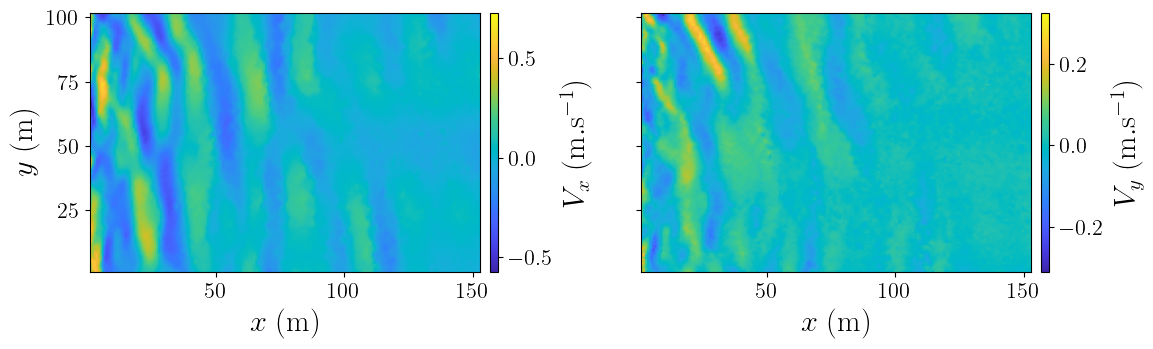

In [6]:
frame = 0
extents_meter = np.array([S['x'].min(),S['x'].max(),S['y'].min(),S['y'].max()])
extents_pix = np.array([S['PIXEL']['x_pix'].min(),S['PIXEL']['x_pix'].max(),
                    S['PIXEL']['y_pix'].min(),S['PIXEL']['y_pix'].max()])

set_graphs.set_matplotlib_param('single')
fig, axs = plt.subplots(ncols = 2,sharey = True, figsize = (12,8))
imsh = axs[0].imshow(Vx[:,:,frame].T,cmap = parula_map,origin = 'lower',aspect = 'equal',extent = extents_meter)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$V_x \; \mathrm{(m.s^{-1})}$')

imsh = axs[1].imshow(Vy[:,:,frame].T,cmap = parula_map,origin = 'lower',aspect = 'equal',extent = extents_meter)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$V_y \; \mathrm{(m.s^{-1})}$')

axs[0].set_ylabel(r'$y \; \mathrm{(m)}$')
for ax in axs:
    ax.set_xlabel(r'$x \; \mathrm{(m)}$')

plt.tight_layout()

### Compute projected fields $u_z$ and $u_x$